### 1. Import the necessary libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import re

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [7]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
data = pd.read_csv('.\\files_for_lab\\we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First look at its main features (head, shape, info)

In [8]:
display(data.shape)
data.head(200)

(9134, 24)

Customer       State  Customer Lifetime Value Response  Coverage  \
0    BU79786  Washington              2763.519279       No     Basic   
1    QZ44356     Arizona              6979.535903       No  Extended   
2    AI49188      Nevada             12887.431650       No   Premium   
3    WW63253  California              7645.861827       No     Basic   
4    HB64268  Washington              2813.692575       No     Basic   
5    OC83172      Oregon              8256.297800      Yes     Basic   
6    XZ87318      Oregon              5380.898636      Yes     Basic   
7    CF85061     Arizona              7216.100311       No   Premium   
8    DY87989      Oregon             24127.504020      Yes     Basic   
9    BQ94931      Oregon              7388.178085       No  Extended   
10   SX51350  California              4738.992022       No     Basic   
11   VQ65197  California              8197.197078       No     Basic   
12   DP39365  California              8798.797003       No   Premium   
13   SJ95423     Arizona              8819.018934      Yes     Basic   
14   IL66569  California              5384.431665       No     Basic   
15   BW63560      Oregon              7463.139377       No     Basic   
16   FV94802      Nevada              2566.867823       No     Basic   
17   OE15005  California              3945.241604       No     Basic   
18   WC83389      Oregon              5710.333115       No     Basic   
19   FL50705  California              8162.617053       No   Premium   
20   ZK25313      Oregon              2872.051273       No     Basic   
21   SV62436  Washington              3041.791561       No  Extended   
22   YH23384     Arizona             24127.504020      Yes     Basic   
23   TZ98966      Nevada              2450.190996       No     Basic   
24   HM55802  California              2392.107890       No     Basic   
25   FS42516      Oregon              5802.065978       No     Basic   
26   US89481  California              3946.372085       No   Premium   
27   HO30839  Washington              5346.916576       No  Extended   
28   GE62437     Arizona             12902.560140       No   Premium   
29   EJ77678      Oregon              3235.360468       No  Extended   
30   SV85652     Arizona              2454.583540       No     Basic   
31   UL64533      Nevada             18975.456110       No  Extended   
32   PF41800  California              4715.321344       No     Basic   
33   AO98601  Washington              5018.885233       No     Basic   
34   SK67821      Oregon              4932.916345       No     Basic   
35   YV55495     Arizona              5744.229745       No     Basic   
36   KY38074  California             13891.735670       No   Premium   
37   DM79012      Oregon              7380.976717       No  Extended   
38   CM61827      Oregon              3090.034104       No  Extended   
39   WC35801     Arizona              2521.633095       No     Basic   
40   QG25316      Nevada              2652.061785       No     Basic   
41   MB98372      Oregon              2771.045031      Yes     Basic   
42   IL19217  California              3939.006370      Yes  Extended   
43   SR38658     Arizona             12231.879680       No     Basic   
44   DH41343  Washington              2443.665166       No     Basic   
45   HG65722      Oregon             12819.102890       No   Premium   
46   BU27331     Arizona              4468.510542       No     Basic   
47   XM45289      Oregon              5514.344018       No     Basic   
48   KP34198  California              3343.875326       No  Extended   
49   SH90947     Arizona              2294.478927       No     Basic   
50   WE95729      Oregon             36707.426390       No     Basic   
51   PY51963  California             33473.349460      Yes     Basic   
52   RB69909      Nevada              7983.431709       No     Basic   
53   XR95069  Washington              4854.745666       No     Basic   
54   FR46645  California              4293.9

In [9]:
data.describe().T

count          mean           std  \
Customer Lifetime Value        9134.0   8004.940475   6870.967608   
Income                         9134.0  37657.380009  30379.904734   
Monthly Premium Auto           9134.0     93.219291     34.407967   
Months Since Last Claim        9134.0     15.097000     10.073257   
Months Since Policy Inception  9134.0     48.064594     27.905991   
Number of Open Complaints      9134.0      0.384388      0.910384   
Number of Policies             9134.0      2.966170      2.390182   
Total Claim Amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
Customer Lifetime Value        1898.007675  3994.251794   5780.182197   
Income                            0.000000     0.000000  33889.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   272.258244    383.945434   

                                        75%           max  
Customer Lifetime Value         8962.167041  83325.381190  
Income                         62320.000000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               547.514839   2893.239678

In [15]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [22]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [13]:
cols = data.columns.values
cols2 = []
for i in cols:
    
    i = re.sub(r"(\w)([A-Z])", r"\1_\2", i).lower()
    cols2.append(i)
    
cols2

data.columns = cols2

data.columns = [i.lower().replace(' ', '_') for i in data.columns]
data.head().T

0              1              2  \
customer                              BU79786        QZ44356        AI49188   
state                              Washington        Arizona         Nevada   
customer_lifetime_value           2763.519279    6979.535903    12887.43165   
response                                   No             No             No   
coverage                                Basic       Extended        Premium   
education                            Bachelor       Bachelor       Bachelor   
effective_to_date                     2/24/11        1/31/11        2/19/11   
employment_status                    Employed     Unemployed       Employed   
gender                                      F              F              F   
income                                  56274              0          48767   
location_code                        Suburban       Suburban       Suburban   
marital_status                        Married         Single        Married   
monthly_premium_auto                       69             94            108   
months_since_last_claim                    32             13             18   
months_since_policy_inception               5             42             38   
number_of_open_complaints                   0              0              0   
number_of_policies                          1              8              2   
policy_type                    Corporate Auto  Personal Auto  Personal Auto   
policy                           Corporate L3    Personal L3    Personal L3   
renew_offer_type                       Offer1         Offer3         Offer1   
sales_channel                           Agent          Agent          Agent   
total_claim_amount                 384.811147    1131.464935     566.472247   
vehicle_class                    Two-Door Car  Four-Door Car   Two-Door Car   
vehicle_size                          Medsize        Medsize        Medsize   

                                            3              4  
customer                              WW63253        HB64268  
state                              California     Washington  
customer_lifetime_value           7645.861827    2813.692575  
response                                   No             No  
coverage                                Basic          Basic  
education                            Bachelor       Bachelor  
effective_to_date                     1/20/11         2/3/11  
employment_status                  Unemployed       Employed  
gender                                      M              M  
income                                      0          43836  
location_code                        Suburban          Rural  
marital_status                        Married         Single  
monthly_premium_auto                      106             73  
months_since_last_claim                    18             12  
months_since_policy_inception              65             44  
number_of_open_complaints                   0              0  
number_of_policies                          7              1  
policy_type                    Corporate Auto  Personal Auto  
policy                           Corporate L2    Personal L1  
renew_offer_type                       Offer1         Offer1  
sales_channel                     Call Center          Agent  
total_claim_amount                 529.881344     138.130879  
vehicle_class                             SUV  Four-Door Car  
vehicle_size                          Medsize        Medsize

### 5. Change effective to date column to datetime format

In [19]:
#data['effective_to_date'] = data['effective_to_date'].astype(datetime)
#data['effective_to_date'].apply(pd.to_datetime)
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [21]:
data

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employment_status gender  income  \
0     Bachelor        2011-02-24          Employed      F   56274   
1     Bachelor        2011-01-31        Unemployed      F       0   
2     Bachelor        2011-02-19          Employed      F   48767   
3     Bachelor        2011-01-20        Unemployed      M       0   
4     Bachelor        2011-02-03          Employed      M   43836   
...        ...               ...               ...    ...     ...   
9129  Bachelor        2011-02-10          Employed      M   71941   
9130   College        2011-02-12          Employed      F   21604   
9131  Bachelor        2011-02-06        Unemployed      M       0   
9132   College        2011-02-03          Employed      M   21941   
9133   College        2011-02-14        Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0         

### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [38]:
# def d_split_types(col):
#     discrete_df = pd.DataFrame()
#     continuous_df = pd.DataFrame()
#     col = data.columns
#     if col.select_dtypes(include=['int']):
#         return discrete_df().append()
# #     elif:
# #         col.select_dtypes(include=['float']):
# #             return continuous_df().append()
#     else:
#         return col
    
    
# #data['effective_to_date'].astype(datetime)
# d_split_types(data)

In [39]:
def d_split_types(df):
    discrete_df = df.select_dtypes(include=['int'])
    continuous_df = df.select_dtypes(include=['float'])
    
    return discrete_df,continuous_df
discrete_df, continuous_df = d_split_types(data)

In [43]:
discrete_df.columns

Index(['income', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [44]:
continuous_df.columns

Index(['customer_lifetime_value', 'total_claim_amount'], dtype='object')

In [47]:
# d_df = pd.DataFrame()
# type(d_df)

In [52]:
discrete_df['income'].value_counts
# moving income to continuous_df

<bound method IndexOpsMixin.value_counts of 0       56274
1           0
2       48767
3           0
4       43836
        ...  
9129    71941
9130    21604
9131        0
9132    21941
9133        0
Name: income, Length: 9134, dtype: int64>

In [58]:

continuous_df.append(discrete_df['income'])
continuous_df.columns

Index(['customer_lifetime_value', 'total_claim_amount'], dtype='object')

In [59]:
data_num = data._get_numeric_data()
data_cat = data.select_dtypes('object')
data_num

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [60]:
def continuous(df):

    discrete_list = []
    continuous_list = []
    
    for col in df:
        
        if (df[col].nunique() < (data_num['income'].nunique()/10)) & (df[col].dtypes == 'int64'):
            discrete_list.append(col)
        
        else:
            continuous_list.append(col)
    
    
    discrete_df = pd.DataFrame(data_num[discrete_list])
    continuous_df = pd.DataFrame(data_num[continuous_list]) 
                    

    return discrete_df, continuous_df


In [61]:
discrete_customer, continuous_customer = continuous(data_num)

In [62]:
discrete_customer

monthly_premium_auto  months_since_last_claim  \
0                       69                       32   
1                       94                       13   
2                      108                       18   
3                      106                       18   
4                       73                       12   
...                    ...                      ...   
9129                    73                       18   
9130                    79                       14   
9131                    85                        9   
9132                    96                       34   
9133                    77                        3   

      months_since_policy_inception  number_of_open_complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      number_of_policies  
0                      1  
1                      8  
2                      2  
3                      7  
4                      1  
...                  ...  
9129                   2  
9130                   1  
9131                   2  
9132                   3  
9133                   1  

[9134 rows x 5 columns]

In [63]:
continuous_customer

customer_lifetime_value  income  total_claim_amount
0                 2763.519279   56274          384.811147
1                 6979.535903       0         1131.464935
2                12887.431650   48767          566.472247
3                 7645.861827       0          529.881344
4                 2813.692575   43836          138.130879
...                       ...     ...                 ...
9129             23405.987980   71941          198.234764
9130              3096.511217   21604          379.200000
9131              8163.890428       0          790.784983
9132              7524.442436   21941          691.200000
9133              2611.836866       0          369.600000

[9134 rows x 3 columns]

### 7. Plot a correlation matrix, comment what you see

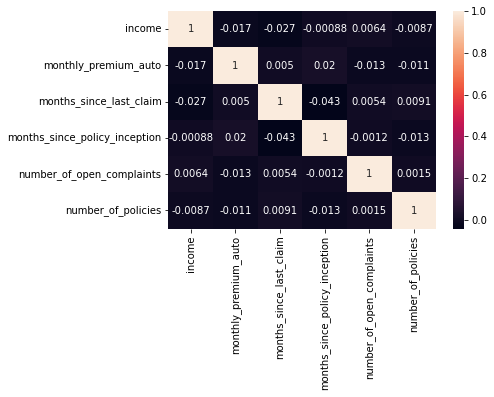

In [54]:
correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Very little corrrelation with each other

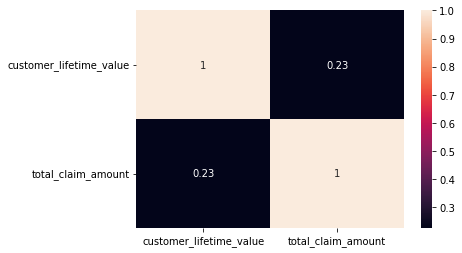

In [55]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

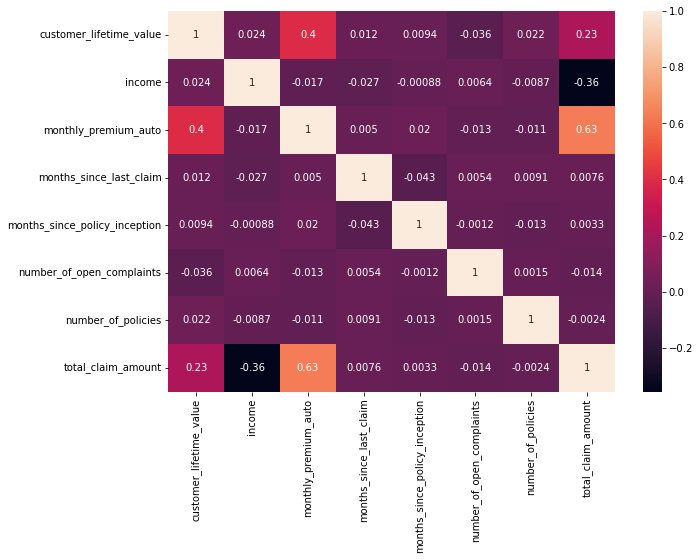

In [69]:
plt.figure(figsize = (10,7))
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# There is a high correlation between total claim amount and monthly premium auto
# and a reasonable correlation between total claim amount and customer lifetime value
# there doesn't seem to be any concerning correlations that would justify dropping a feature

### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [118]:
def con_plotter(df):
    for col in df:
        sns.kdeplot(df[col])
        plt.show()

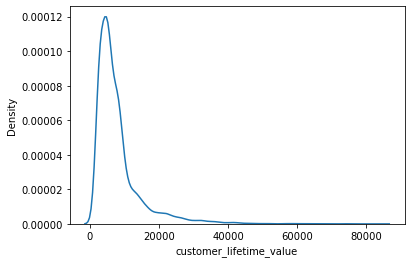

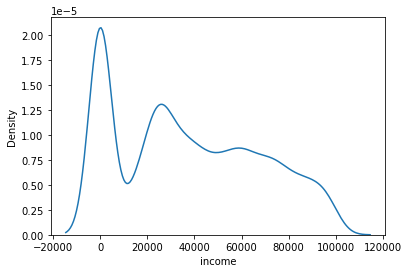

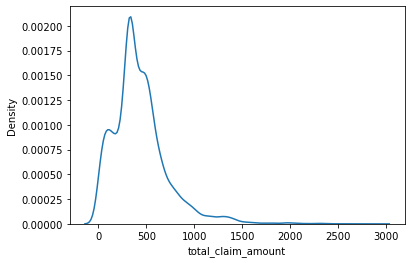

In [119]:
con_plotter(continuous_customer)

In [114]:
def disc_plotter(df):
    for col in df:
        sns.histplot(df[col])
        plt.show()
#    return 



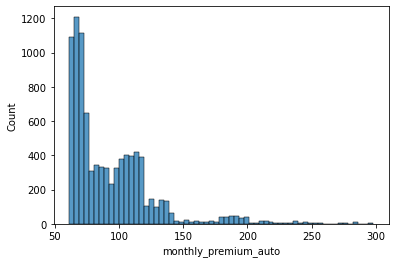

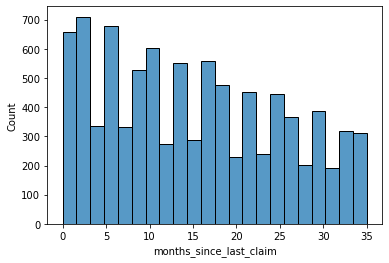

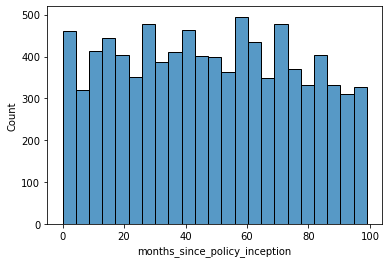

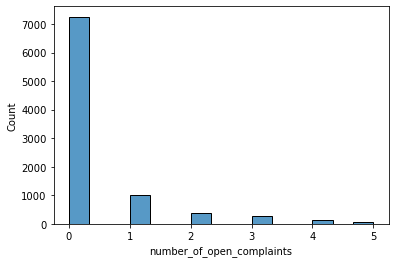

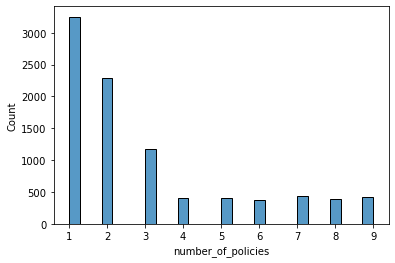

In [115]:
disc_plotter(discrete_customer)

### 9. Comment what you can see in the plots

In [ ]:
# Customer lifetime value, monthly premium auto, total claim amount and income are unevenly distributed
# as is number of policies and number of open complaints. Although income has a 2nd peak

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [126]:
def box_plotter(df):
    for col in df:
        sns.boxplot(y=df[col])
        plt.show()

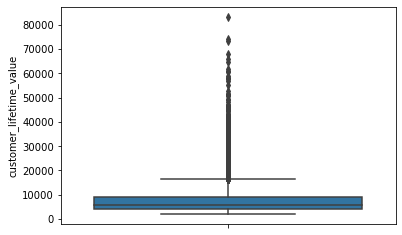

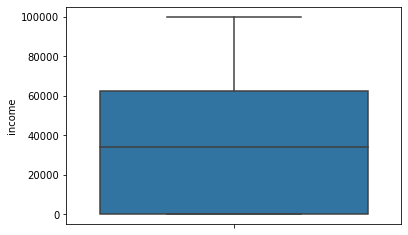

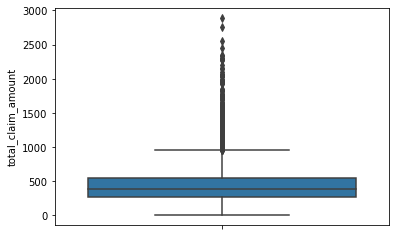

In [127]:
box_plotter(continuous_customer)

### 11. Did you find outliers? Comment what you will do with them

In [ ]:
# Both customer lifetime value and total claim amount have a few outliers,
# but income doesn't.
# I would leave the total claim amount outliers as this seems like it would be
# our Target. For customer lifetime value, I would create bins to group them as
# I would not want to lose this data

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them

In [128]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64